In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tkt
import numpy as np
import pandas as pd
from IPython.display import Image as IPImage

# Задача 2

Пусть состояние клубней определяется их весом на универсальном множестве   U~X1= [0; 500] граммов, а состояние ботвы — также ее весом на универсальном множестве U~X2= [0; 50] граммов.
Прогнозу подлежит урожайность сахарной свеклы, изменяющаяся в диапазоне  U~Y= **[35; 55]** тонн с гектара. 

Три лингвистические переменные:
- a - "Вес клубней". Промежутки **(0-150, 150-300, 300-500)**
- b - "Вес ботвы". Промежутки **(1-25, 25-50)**
- с - "Урожай". Промежутки **(35-40, 40-45, 45-50, 50-55)**

In [2]:
interval_a = ['0 - 150', '150 - 300', '300 - 500']
interval_b = ['1 - 25', '25 - 50']
interval_c = ['35 - 40', '40 - 45', '45 - 50', '50 - 55']

rul = ['BH ^ Б', 'BH ^ М', 'H ^ Б', 'H ^ М', 'НH ^ Б', 'НH ^ М']

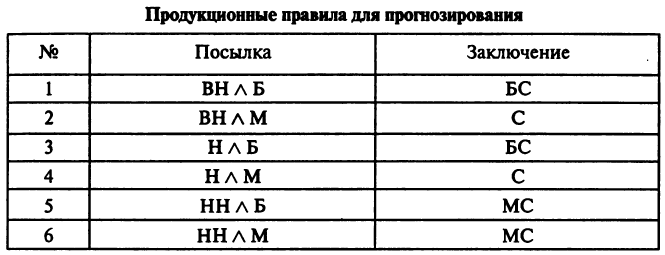

In [3]:
IPImage("1.png")

### Данные заданые экспертом

In [4]:
X1 = [[0, 0.25, 1], [0.2, 1, 0.25], [1, 0.3, 0]]
X2 = [[0.2, 1], [1, 0.1]]
UY = [[0.1, 0.3, 0.65, 1], [0.2, 1, 0.9, 0.2], [1, 0.3, 0.1, 0]]

In [5]:
X1f = pd.DataFrame(X1, columns = interval_a, index = ['ВН', 'Н', 'НН'])
X2f = pd.DataFrame(X2, columns = interval_b, index = ['Б', 'М'])
UYf = pd.DataFrame(UY, columns = interval_c, index = ['БС', 'С', 'МС'])

#### Фаззификация нечеткой переменной X1

In [6]:
X1f

,0 - 150,150 - 300,300 - 500
ВН,0.0,0.25,1.00
Н,0.2,1.00,0.25
НН,1.0,0.30,0.00


#### Фаззификация нечеткой переменной X2

In [7]:
X2f

,1 - 25,25 - 50
Б,0.2,1.0
М,1.0,0.1


#### Фаззификация нечеткой переменной Y

In [8]:
UYf

,35 - 40,40 - 45,45 - 50,50 - 55
БС,0.1,0.3,0.65,1.0
С,0.2,1.0,0.90,0.2
МС,1.0,0.3,0.10,0.0


In [9]:
compose = []
nt = []
for item in [(0, 0), (0,1), (1,0), (1,1), (2,0), (2,1)]:
    compose.append(interval_a[item[0]]+'; '+interval_b[item[1]])
    tmp = []
    for itemi in X1[item[0]]:
        for itemj in X2[item[1]]:
            tmp.append(min(itemi, itemj))
    nt.append(tmp)
    
ntf = pd.DataFrame(np.array(nt).T, columns = rul, index = compose)

#### Значения функции принадлежности для левой части правил

In [10]:
ntf

,BH ^ Б,BH ^ М,H ^ Б,H ^ М,НH ^ Б,НH ^ М
0 - 150; 1 - 25,0.00,0.00,0.20,0.20,0.2,1.0
0 - 150; 25 - 50,0.00,0.00,0.20,0.10,1.0,0.1
150 - 300; 1 - 25,0.20,0.25,0.20,1.00,0.2,0.3
150 - 300; 25 - 50,0.25,0.10,1.00,0.10,0.3,0.1
300 - 500; 1 - 25,0.20,1.00,0.20,0.25,0.0,0.0
300 - 500; 25 - 50,1.00,0.10,0.25,0.10,0.0,0.0


### Представление нечетких правил

In [11]:
def rules(col):
    if col == 0 or col == 2: return 0
    elif col == 1 or  col == 3: return 1
    else: return 2

In [12]:
table = []
for j in range(len(nt)):
    tmpup = []
    for z in range(len(UY[0])):
        tmp = []
        for item in nt[j]:
            tmp.append(min(item,UY[rules(j)][z]))
        tmpup.append(tmp)
    table.append(tmpup)

In [13]:
frame = pd.DataFrame(np.array(table[0]).T, columns = interval_c, index = compose)
print(rul[0])
frame

BH ^ Б


,35 - 40,40 - 45,45 - 50,50 - 55
0 - 150; 1 - 25,0.0,0.00,0.00,0.00
0 - 150; 25 - 50,0.0,0.00,0.00,0.00
150 - 300; 1 - 25,0.1,0.20,0.20,0.20
150 - 300; 25 - 50,0.1,0.25,0.25,0.25
300 - 500; 1 - 25,0.1,0.20,0.20,0.20
300 - 500; 25 - 50,0.1,0.30,0.65,1.00


In [14]:
frame = pd.DataFrame(np.array(table[1]).T, columns = interval_c, index = compose)
print(rul[1])
frame

BH ^ М


,35 - 40,40 - 45,45 - 50,50 - 55
0 - 150; 1 - 25,0.0,0.00,0.00,0.0
0 - 150; 25 - 50,0.0,0.00,0.00,0.0
150 - 300; 1 - 25,0.2,0.25,0.25,0.2
150 - 300; 25 - 50,0.1,0.10,0.10,0.1
300 - 500; 1 - 25,0.2,1.00,0.90,0.2
300 - 500; 25 - 50,0.1,0.10,0.10,0.1


In [15]:
frame = pd.DataFrame(np.array(table[2]).T, columns = interval_c, index = compose)
print(rul[2])
frame

H ^ Б


,35 - 40,40 - 45,45 - 50,50 - 55
0 - 150; 1 - 25,0.1,0.20,0.20,0.20
0 - 150; 25 - 50,0.1,0.20,0.20,0.20
150 - 300; 1 - 25,0.1,0.20,0.20,0.20
150 - 300; 25 - 50,0.1,0.30,0.65,1.00
300 - 500; 1 - 25,0.1,0.20,0.20,0.20
300 - 500; 25 - 50,0.1,0.25,0.25,0.25


In [16]:
frame = pd.DataFrame(np.array(table[3]).T, columns = interval_c, index = compose)
print(rul[3])
frame

H ^ М


,35 - 40,40 - 45,45 - 50,50 - 55
0 - 150; 1 - 25,0.2,0.20,0.20,0.2
0 - 150; 25 - 50,0.1,0.10,0.10,0.1
150 - 300; 1 - 25,0.2,1.00,0.90,0.2
150 - 300; 25 - 50,0.1,0.10,0.10,0.1
300 - 500; 1 - 25,0.2,0.25,0.25,0.2
300 - 500; 25 - 50,0.1,0.10,0.10,0.1


In [17]:
frame = pd.DataFrame(np.array(table[4]).T, columns = interval_c, index = compose)
print(rul[4])
frame

НH ^ Б


,35 - 40,40 - 45,45 - 50,50 - 55
0 - 150; 1 - 25,0.2,0.2,0.1,0.0
0 - 150; 25 - 50,1.0,0.3,0.1,0.0
150 - 300; 1 - 25,0.2,0.2,0.1,0.0
150 - 300; 25 - 50,0.3,0.3,0.1,0.0
300 - 500; 1 - 25,0.0,0.0,0.0,0.0
300 - 500; 25 - 50,0.0,0.0,0.0,0.0


In [18]:
frame = pd.DataFrame(np.array(table[5]).T, columns = interval_c, index = compose)
print(rul[5])
frame

НH ^ М


,35 - 40,40 - 45,45 - 50,50 - 55
0 - 150; 1 - 25,1.0,0.3,0.1,0.0
0 - 150; 25 - 50,0.1,0.1,0.1,0.0
150 - 300; 1 - 25,0.3,0.3,0.1,0.0
150 - 300; 25 - 50,0.1,0.1,0.1,0.0
300 - 500; 1 - 25,0.0,0.0,0.0,0.0
300 - 500; 25 - 50,0.0,0.0,0.0,0.0


#### Значения функции принадлежности для нечеткого оношения R

In [19]:
R = np.array(table[0])
for i in range(len(R)):
    for j in range(len(R[0])):
        R[i][j] = max(table[0][i][j],table[1][i][j],table[2][i][j],table[3][i][j],table[4][i][j],table[5][i][j])
frameR = pd.DataFrame(np.array(R).T, columns = interval_c, index = compose)
frameR

,35 - 40,40 - 45,45 - 50,50 - 55
0 - 150; 1 - 25,1.0,0.3,0.20,0.2
0 - 150; 25 - 50,1.0,0.3,0.20,0.2
150 - 300; 1 - 25,0.3,1.0,0.90,0.2
150 - 300; 25 - 50,0.3,0.3,0.65,1.0
300 - 500; 1 - 25,0.2,1.0,0.90,0.2
300 - 500; 25 - 50,0.1,0.3,0.65,1.0


In [ ]:
№

In [20]:
inputfactor = [0,0,0,0,1,0]
answer = R.T[inputfactor.index(1)]
answerf = pd.DataFrame(answer.reshape(1,4), columns = interval_c, index = ['G'])
answerf

,35 - 40,40 - 45,45 - 50,50 - 55
G,0.3,1.0,0.9,0.2


In [21]:
print('Вывод: Наиболее вероятно попадание в интервал', interval_c[list(answer).index(max(answer))])

Вывод: Наиболее вероятно попадание в интервал 40 - 45
